In [1]:
import numpy as np
from saem import CSEMData
import matplotlib.pyplot as plt
# plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook
from pygimli.viewer.mpl import drawModel1D

In [2]:
df = 0.5  # 0.5/1 for half/full octave
fMin, fMax = 32, 25000
f = np.round(2**np.arange(0, np.log2(fMax/fMin), df) * fMin)
# f = np.hstack((f[3], f[5:-3], f[-2:]))
f = np.hstack((f[5:-3], f[-2:])) # , 32000, 64000))
print(f)

[  181.   256.   362.   512.   724.  1024.  1448.  2048.  2896.  4096.
  5793.  8192. 16384. 23170.]


In [3]:
x = np.arange(100, 801, 100)  # receiver positions
txLen = 1000  # length of the transmitter
# self = CSEMData(f=f, rx=x, ry=np.zeros_like(x), txPos=np.array([[0, 0], [-txLen/2, txLen/2]]), alt=30)
# RR: ry must be given now!
self = CSEMData(f=f, rx=x, ry=np.zeros_like(x), txPos=np.array([[0, 0], [-txLen/2, txLen/2]]), alt=30)
# RR: alt is not taken!
self.alt = np.ones_like(x) * 30
self.cmp = [1, 0, 1]
print(self)

CSEM data with 8 stations and 14 frequencies
Transmitter length 1000m
Median Rx distance 100.0m
Sounding pos at 100.000000,0.000000,0.000000,


c:\Program Files\software\Anaconda\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Program Files\software\Anaconda\envs\py38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


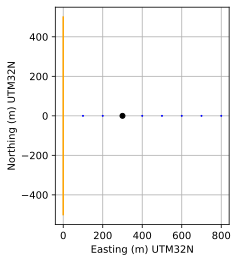

In [4]:
self.setPos(2, show=True)

In [5]:
rho = [200, 10, 100, 5]
thk = [10, 10, 10]
self.simulate(rho=rho, thk=thk)

In [6]:
# self.DATA = self.RESP  # + noise  # avoids what="response"
self.DATA = self.RESP.copy()
from numpy.random import randn
noiseLevel = 1e-3  # nV/A
sh = self.DATA.shape
noise = (randn(*sh) + randn(*sh) * 1j) * noiseLevel
self.DATA += noise

(14, 8)
(14, 8)


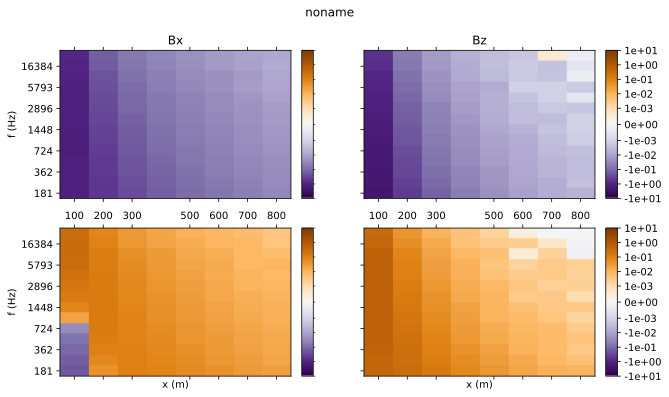

In [7]:
self.showLineData();

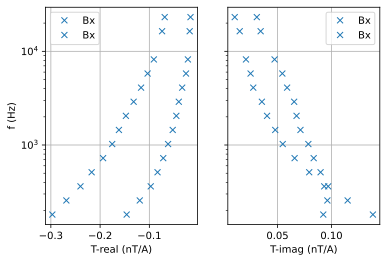

In [8]:
self.showSounding(2, amphi=False);  # what the hell! compare with SimpleModelling

In [9]:
# self.createDepthVector(rho=10)
self.depth = np.arange(0., 101, 3)
print(self.depth)

[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45. 48. 51.
 54. 57. 60. 63. 66. 69. 72. 75. 78. 81. 84. 87. 90. 93. 96. 99.]


24/11/22 - 10:45:37 - pyGIMLi - INFO - Starting model set from given array. 34 [111.6959435810299, 83.15143358958514, 51.14623353056584, 28.87730605703267, 17.30921499842841, 12.6822929830661, 11.520833439893506, 11.658785533248903, 11.826500543561307, 11.377231946909738, 10.222547716082147, 8.67253523475295, 7.141038279217008, 5.905444347731283, 5.049373007861301, 4.533423896485171, 4.279353853972474, 4.213886323231966, 4.278778856677808, 4.427756923647001, 4.622506621443234, 4.830568339817587, 5.025495328698302, 5.1875925425371765, 5.304552723532601, 5.371291230634277, 5.389084984699713, 5.364117474540974, 5.305725382056551, 5.224656167737431, 5.1316269530107705, 5.036309834454036, 4.946760996064594, 4.869225379750011]
24/11/22 - 10:45:37 - pyGIMLi - INFO - Starting inversion.


fop: <saem.modelling.fopSAEM object at 0x00000196CADE22C0>
Data transformation: <pygimli.core._pygimli_.RTrans object at 0x00000196CAEFA6A0>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x00000196CADE26D0>
min/max (data): -0.3/0.14
min/max (error): 0.34%/9.66%
min/max (start model): 4.21/112
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.65 (dPhi = 0.43%) lam: 50
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.64 (dPhi = 0.02%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.64 (dPhi = -0.0%) lam: 50.0
################################################################################
#                 Abort criteria reached: dPhi = -0.0 (< 2.0%)                 #
##############################################

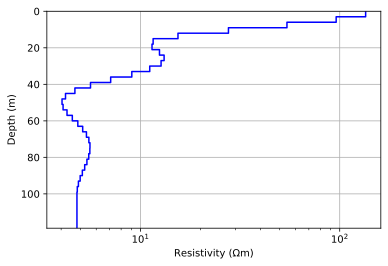

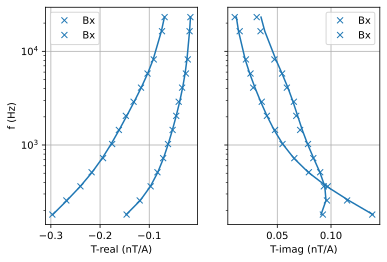

In [12]:
self.invertSounding(2, absError=noiseLevel, relError=0, blockyModel=1, lam=50, verbose=True);

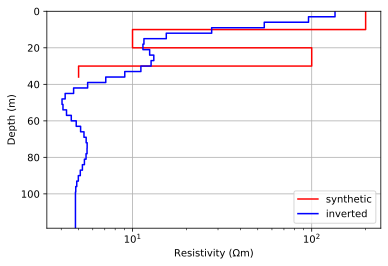

In [13]:
fig, ax = plt.subplots()
drawModel1D(ax, thk, rho, color="red", label="synthetic")
drawModel1D(ax, np.diff(self.depth), self.model, color="blue", plot='semilogx', label="inverted")
ax.legend();